In [1]:
pip install nb_black

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install jupyter_contrib_nbextensions

Note: you may need to restart the kernel to use updated packages.


In [3]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [4]:
# Set up environment
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

sns.set()

# supress warnings (warnings do not prevent the code from executing)
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [5]:
df = pd.read_csv(
    r"/Users/tarrantcarter/Dropbox/Data Science/Thinkful/Thinkful Data Science Projects/Unsupervised_Learning_Capstone/sales_data_sample.csv",
    encoding="unicode_escape",
)

<IPython.core.display.Javascript object>

In [6]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


<IPython.core.display.Javascript object>

In [7]:
# df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"])

<IPython.core.display.Javascript object>

In [8]:
# drop columns that aren't useful
df2 = df.drop(
    [
        "ORDERNUMBER",
        "STATUS",
        "PHONE",
        "ADDRESSLINE1",
        "ADDRESSLINE2",
        "CITY",
        "POSTALCODE",
        "CONTACTLASTNAME",
        "CONTACTFIRSTNAME",
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [9]:
# functiom that displays the percentage of missing values from each column
def missingness_summary(df, print_log=True, sort="descending"):
    percentage_null = df.isnull().sum() * 100 / df.isnull().count()
    pd.set_option("display.max_rows", None)
    if sort.lower() == "ascending":
        percentage_null = percentage_null.sort_values(ascending=True)
    elif sort.lower() == "descending":
        percentage_null = percentage_null.sort_values(ascending=False)
    if print_log:
        print(percentage_null)

    return pd.Series(percentage_null)


missing = missingness_summary(df2)

STATE              52.639036
TERRITORY          38.044633
DEALSIZE            0.000000
COUNTRY             0.000000
CUSTOMERNAME        0.000000
PRODUCTCODE         0.000000
MSRP                0.000000
PRODUCTLINE         0.000000
YEAR_ID             0.000000
MONTH_ID            0.000000
QTR_ID              0.000000
ORDERDATE           0.000000
SALES               0.000000
ORDERLINENUMBER     0.000000
PRICEEACH           0.000000
QUANTITYORDERED     0.000000
dtype: float64


<IPython.core.display.Javascript object>

In [10]:
# drop state and territoy column
df3 = df2.drop(["STATE", "TERRITORY"], axis=1)
missing = missingness_summary(df3)

DEALSIZE           0.0
COUNTRY            0.0
CUSTOMERNAME       0.0
PRODUCTCODE        0.0
MSRP               0.0
PRODUCTLINE        0.0
YEAR_ID            0.0
MONTH_ID           0.0
QTR_ID             0.0
ORDERDATE          0.0
SALES              0.0
ORDERLINENUMBER    0.0
PRICEEACH          0.0
QUANTITYORDERED    0.0
dtype: float64


<IPython.core.display.Javascript object>

In [11]:
print("Number of Object Columns:", df3.select_dtypes(object).shape[1])
print("Number of Numeric Columns:", df3.select_dtypes(["integer", "float"]).shape[1])

Number of Object Columns: 6
Number of Numeric Columns: 8


<IPython.core.display.Javascript object>

In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   ORDERDATE        2823 non-null   object 
 5   QTR_ID           2823 non-null   int64  
 6   MONTH_ID         2823 non-null   int64  
 7   YEAR_ID          2823 non-null   int64  
 8   PRODUCTLINE      2823 non-null   object 
 9   MSRP             2823 non-null   int64  
 10  PRODUCTCODE      2823 non-null   object 
 11  CUSTOMERNAME     2823 non-null   object 
 12  COUNTRY          2823 non-null   object 
 13  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(6), object(6)
memory usage: 308.9+ KB


<IPython.core.display.Javascript object>

In [13]:
df3.describe()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


<IPython.core.display.Javascript object>

In [14]:
df4 = df3.drop("ORDERLINENUMBER", axis=1)

<IPython.core.display.Javascript object>

In [15]:
df4.describe(include="O")

,ORDERDATE,PRODUCTLINE,PRODUCTCODE,CUSTOMERNAME,COUNTRY,DEALSIZE
count,2823,2823,2823,2823,2823,2823
unique,252,7,109,92,19,3
top,11/14/2003 0:00,Classic Cars,S18_3232,Euro Shopping Channel,USA,Medium
freq,38,967,52,259,1004,1384


<IPython.core.display.Javascript object>

In [16]:
!pip install prince

<IPython.core.display.Javascript object>

In [17]:
pip install gower

ERROR:root:Cannot parse: 1:4: pip install gower
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "/opt/anaconda3/lib/python3.7/site-packages/lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "/opt/anaconda3/lib/python3.7/site-packages/black/__init__.py", line 974, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "/opt/anaconda3/lib/python3.7/site-packages/black/__init__.py", line 1083, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 1:4: pip install gower


Note: you may need to restart the kernel to use updated packages.


In [18]:
import gower

dist_matrix = gower.gower_matrix(df4)

<IPython.core.display.Javascript object>

In [19]:
dist_matrix

array([[0.        , 0.2964613 , 0.409979  , ..., 0.59279644, 0.52880853,
        0.57288367],
       [0.2964613 , 0.        , 0.29672557, ..., 0.6377401 , 0.4654475 ,
        0.58530354],
       [0.409979  , 0.29672557, 0.        , ..., 0.57411474, 0.6083269 ,
        0.5589558 ],
       ...,
       [0.59279644, 0.6377401 , 0.57411474, ..., 0.        , 0.37369624,
        0.3232749 ],
       [0.52880853, 0.4654475 , 0.6083269 , ..., 0.37369624, 0.        ,
        0.3672071 ],
       [0.57288367, 0.58530354, 0.5589558 , ..., 0.3232749 , 0.3672071 ,
        0.        ]], dtype=float32)

<IPython.core.display.Javascript object>

In [20]:
pip install pyclustering

ERROR:root:Cannot parse: 1:4: pip install pyclustering
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "/opt/anaconda3/lib/python3.7/site-packages/lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "/opt/anaconda3/lib/python3.7/site-packages/black/__init__.py", line 974, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "/opt/anaconda3/lib/python3.7/site-packages/black/__init__.py", line 1083, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 1:4: pip install pyclustering


Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install prince

ERROR:root:Cannot parse: 1:4: pip install prince
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "/opt/anaconda3/lib/python3.7/site-packages/lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "/opt/anaconda3/lib/python3.7/site-packages/black/__init__.py", line 974, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "/opt/anaconda3/lib/python3.7/site-packages/black/__init__.py", line 1083, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 1:4: pip install prince


Note: you may need to restart the kernel to use updated packages.


In [22]:
from sklearn.cluster import KMeans
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import prince

<IPython.core.display.Javascript object>

In [23]:
famd = prince.FAMD()
famd.fit(df4)
coordinates = famd.transform(df4)
coordinates

,0,1
0,-0.279449,0.711010
1,-0.499708,0.316738
2,0.472794,-0.487552
3,0.248980,-0.350562
4,0.796004,-1.154157
5,0.320031,-1.216269
6,-0.568619,-1.343453
7,1.133992,-1.476432
8,-0.419568,-1.625534
9,0.516493,1.742468


<IPython.core.display.Javascript object>

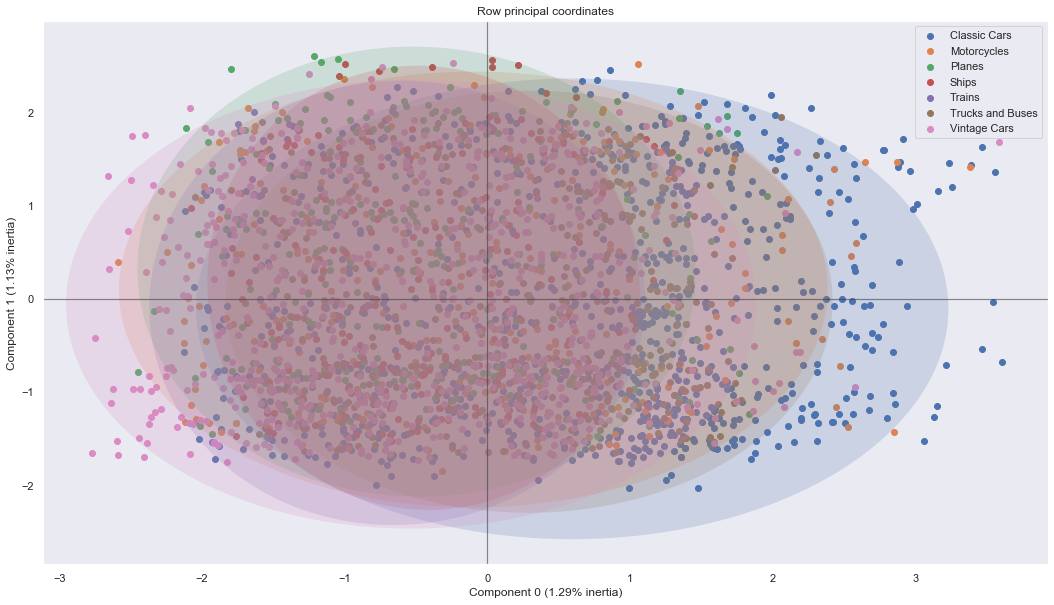

<IPython.core.display.Javascript object>

In [24]:
famd.plot_row_coordinates(
    df4,
    color_labels=df4["PRODUCTLINE"],
    ellipse_fill=True,
    figsize=(18, 10),
)
plt.show()

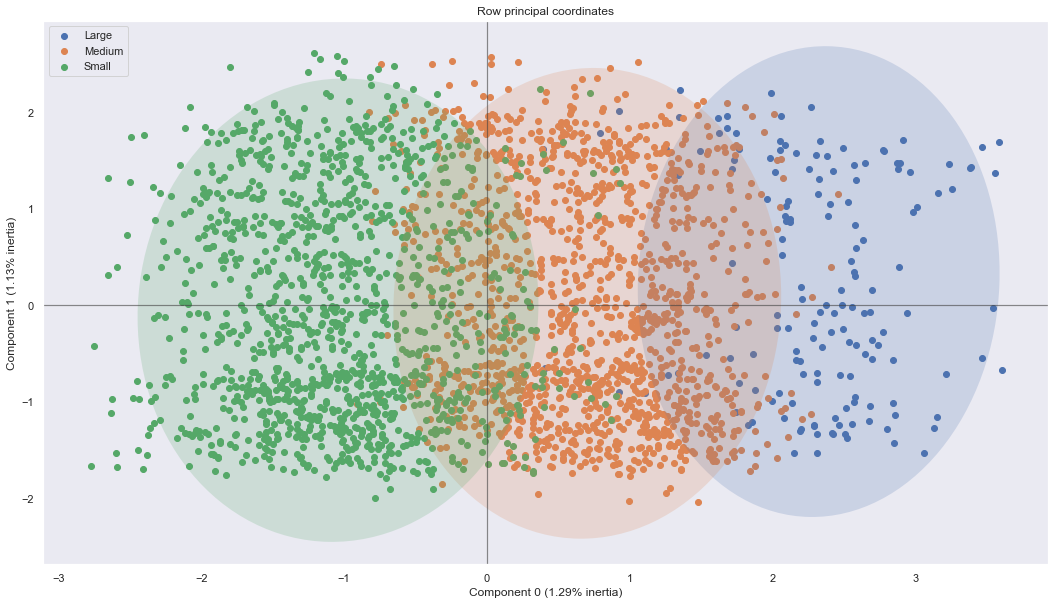

<IPython.core.display.Javascript object>

In [25]:
famd.plot_row_coordinates(
    df4,
    color_labels=df4["DEALSIZE"],
    ellipse_fill=True,
    figsize=(18, 10),
)
plt.show()

In [26]:
# df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"])

<IPython.core.display.Javascript object>

In [27]:
inertia = []
silhouette = []
k_range = range(2, 31)

for k in k_range:
    k_means = KMeans(n_clusters=k)
    k_means.fit(coordinates)
    inertia.append(k_means.inertia_)
    pred = k_means.predict(coordinates)
    silhouette.append(silhouette_score(coordinates, pred, metric="euclidean"))

<IPython.core.display.Javascript object>

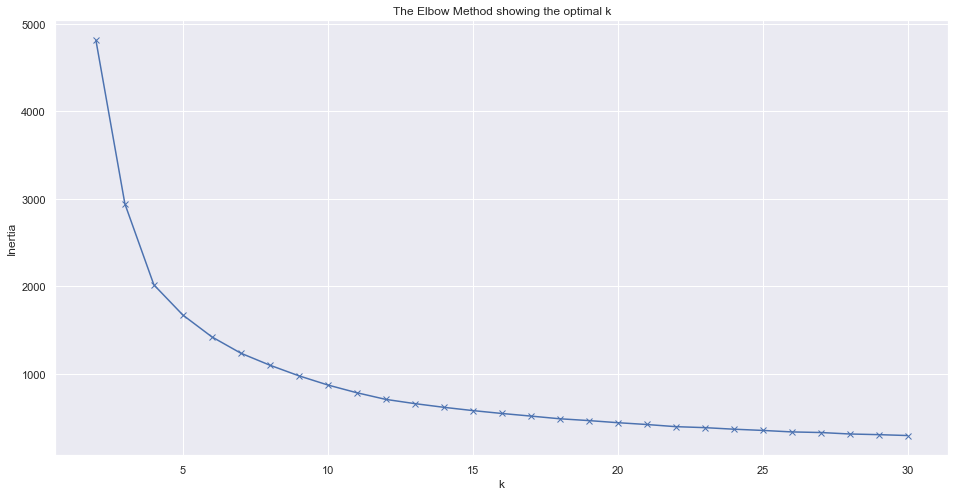

<IPython.core.display.Javascript object>

In [28]:
plt.figure(figsize=(16, 8))
plt.plot(k_range, inertia, "bx-")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("The Elbow Method showing the optimal k")
plt.show()

In [29]:
kmeans = KMeans(n_clusters=4)

kmeans.fit_predict(coordinates)

centers = pd.DataFrame(kmeans.cluster_centers_, columns=coordinates.columns)
centers.style.background_gradient()
# centers_inverse = pd.DataFrame(scale.inverse_transform(centers), columns=X.columns)
# centers_inverse.style.background_gradient()

,0,1
0,0.996023,-0.802801
1,-0.966695,1.122691
2,-1.027746,-0.874422
3,1.028224,1.252253


<IPython.core.display.Javascript object>

In [30]:
df4["K_Cluster"] = kmeans.fit_predict(coordinates)
df4["K_Cluster"].value_counts()

3    873
2    781
1    623
0    546
Name: K_Cluster, dtype: int64

<IPython.core.display.Javascript object>

In [31]:
cluster = df4.groupby("K_Cluster").mean()
cluster.style.background_gradient()

,QUANTITYORDERED,PRICEEACH,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
K_Cluster,,,,,,,
0,39.342491,97.873388,5055.992179,1.423077,3.203297,2004.291209,126.994505
1,32.768860,70.530578,2287.835474,1.492777,3.354735,2004.189406,75.142857
2,31.980794,68.515941,2171.096876,3.624840,9.878361,2003.533931,71.510883
3,36.877434,97.683505,4754.993081,3.589920,9.699885,2003.501718,128.656357


<IPython.core.display.Javascript object>

In [32]:
df4["K_Cluster"].value_counts()

3    873
2    781
1    623
0    546
Name: K_Cluster, dtype: int64

<IPython.core.display.Javascript object>

In [34]:
pip install umap-learn

ERROR:root:Cannot parse: 1:4: pip install umap-learn
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.7/site-packages/lab_black.py", line 218, in format_cell
    formatted_code = _format_code(cell)
  File "/opt/anaconda3/lib/python3.7/site-packages/lab_black.py", line 29, in _format_code
    return format_str(src_contents=code, mode=FileMode())
  File "/opt/anaconda3/lib/python3.7/site-packages/black/__init__.py", line 974, in format_str
    src_node = lib2to3_parse(src_contents.lstrip(), mode.target_versions)
  File "/opt/anaconda3/lib/python3.7/site-packages/black/__init__.py", line 1083, in lib2to3_parse
    raise exc from None
black.InvalidInput: Cannot parse: 1:4: pip install umap-learn


Note: you may need to restart the kernel to use updated packages.


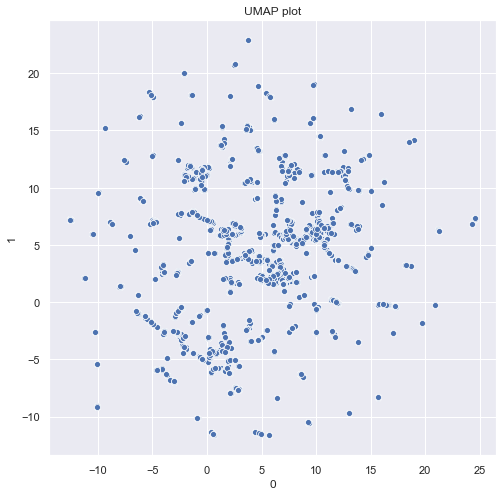

<IPython.core.display.Javascript object>

In [47]:
import umap

U = umap.UMAP(n_neighbors=5, min_dist=0.1, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

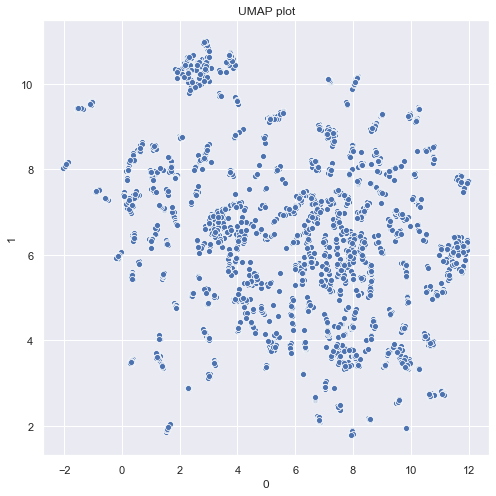

<IPython.core.display.Javascript object>

In [48]:
U = umap.UMAP(n_neighbors=25, min_dist=0.1, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

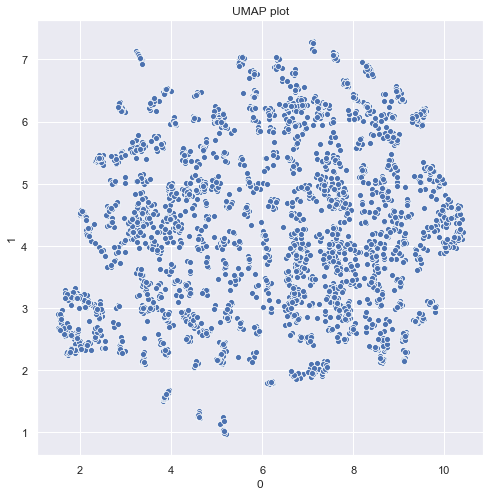

<IPython.core.display.Javascript object>

In [52]:
U = umap.UMAP(n_neighbors=100, min_dist=0.1, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

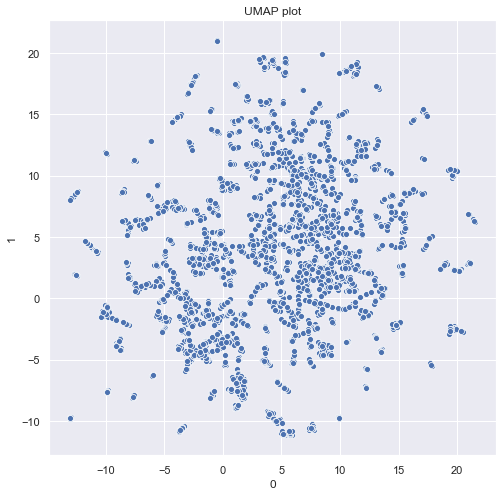

<IPython.core.display.Javascript object>

In [55]:
U = umap.UMAP(n_neighbors=5, min_dist=0.5, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

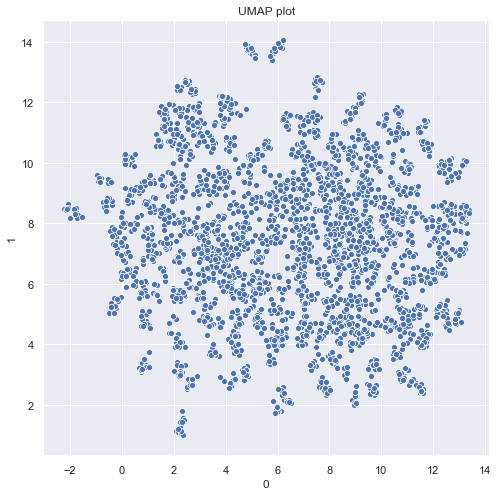

<IPython.core.display.Javascript object>

In [56]:
U = umap.UMAP(n_neighbors=25, min_dist=0.5, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

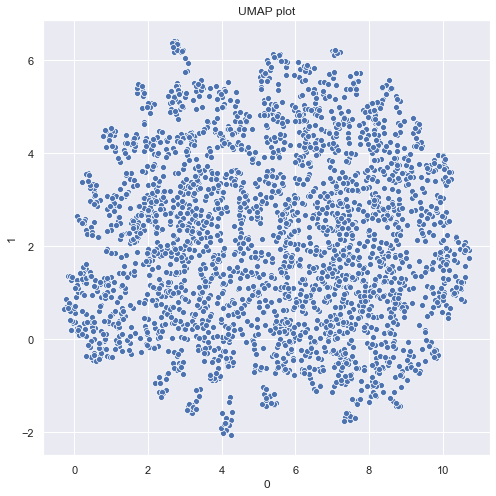

<IPython.core.display.Javascript object>

In [57]:
U = umap.UMAP(n_neighbors=100, min_dist=0.5, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

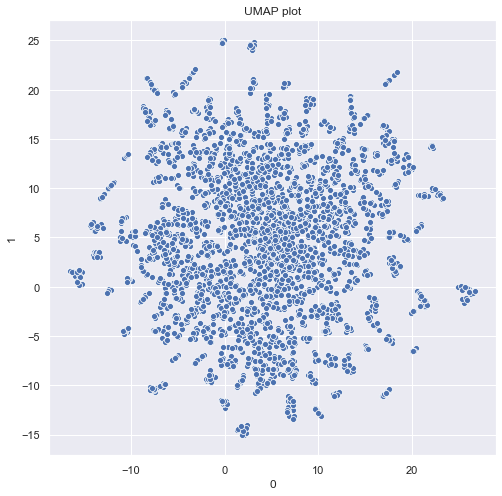

<IPython.core.display.Javascript object>

In [49]:
U = umap.UMAP(n_neighbors=5, min_dist=1, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

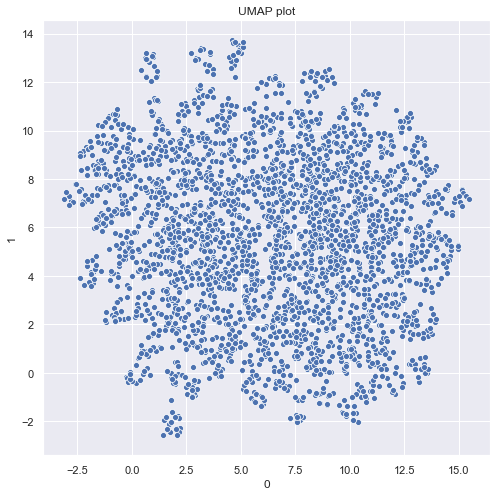

<IPython.core.display.Javascript object>

In [53]:
U = umap.UMAP(n_neighbors=25, min_dist=1, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

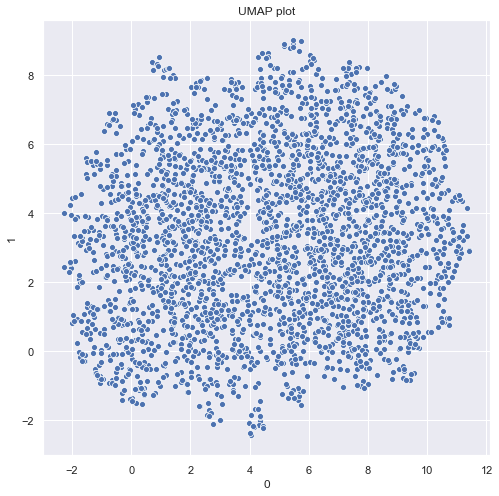

<IPython.core.display.Javascript object>

In [54]:
U = umap.UMAP(n_neighbors=100, min_dist=1, metric="precomputed")
umap_model = pd.DataFrame(U.fit_transform(dist_matrix))

fig, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(x=umap_model[0], y=umap_model[1], data=umap_model, ax=ax)
plt.title(f"UMAP plot")
plt.show()

In [37]:
min_samples_list = range(2,15)

for i in min_samples_list:
    dbscan_cluster = DBSCAN(eps=1, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(dist_matrix)
    print("Number of clusters when min_samples={} is: {}".format(i, len(np.unique(clusters))))


Number of clusters when min_samples=2 is: 465
Number of clusters when min_samples=3 is: 173
Number of clusters when min_samples=4 is: 60
Number of clusters when min_samples=5 is: 23
Number of clusters when min_samples=6 is: 8
Number of clusters when min_samples=7 is: 4
Number of clusters when min_samples=8 is: 2
Number of clusters when min_samples=9 is: 1
Number of clusters when min_samples=10 is: 1
Number of clusters when min_samples=11 is: 1
Number of clusters when min_samples=12 is: 1
Number of clusters when min_samples=13 is: 1
Number of clusters when min_samples=14 is: 1


<IPython.core.display.Javascript object>

In [38]:
for i in [0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    dbscan_cluster = DBSCAN(eps=i, min_samples=1, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(dist_matrix)
    print("Number of clusters when eps={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters when eps=0.01 is: 2823
Number of clusters when eps=0.1 is: 2823
Number of clusters when eps=1 is: 2045


KeyboardInterrupt: 

<IPython.core.display.Javascript object>